In [1]:
# project: p5
# submitter: cjhon
# partner: none
# hours: 10

In [2]:
import pandas as pd
import zipfile
import edgar_utils
import os
import numpy as np
import graphviz


In [3]:
#q1
zf = zipfile.ZipFile('server_log.zip')
df = pd.read_csv(zf.open('rows.csv'))
   
int(df['size'].sum())

24801002666

In [4]:
#q2
ip_count = df["ip"].value_counts()
top_10_ip = dict(ip_count[0:10])
top_10_ip

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [5]:
#q3
status_count = df["code"]
total = len(status_count)
greater_than_400_count = 0
for code in status_count:
    if code >= 400:
        greater_than_400_count += 1
fraction = greater_than_400_count/total
fraction

0.03466852724527611

In [6]:
#q4
big_dict_2 = {}
grouping = df.groupby(['cik','accession','extention']).size()
most_accessed = grouping.idxmax()
elements = []
for i in most_accessed:
    if type(i) != str :
        i = int(i)
    elements.append(i)
string_form = '/'.join([str(item) for item in elements])
string_form

'1627631/0001627631-15-000004/.txt'

In [7]:
#q5
df['crawler'].value_counts().at[1.0]

971

In [8]:
ips= df['ip'].value_counts()
ips = pd.DataFrame(ips)
ips = ips.reset_index()
ips =ips.rename(columns={"index": "ip_address", "ip":"count"})
ips['country'] = ips[['ip_address']].applymap(edgar_utils.lookup_region)
ips

,ip_address,count,country
0,54.152.17.ccg,12562,United States of America
1,183.195.251.hah,6524,China
2,52.45.218.ihf,5562,United States of America
3,68.180.231.abf,5493,United States of America
4,204.212.175.bch,4708,United States of America
...,...,...,...
2494,77.57.170.dci,1,Switzerland
2495,163.172.66.aea,1,France
2496,198.52.97.edc,1,United States of America
2497,115.114.46.jfc,1,India


In [9]:
#q6
ips.value_counts('country').index[0]

'United States of America'

In [10]:
#q7

return_dict = {}
for country in ips['country'].unique():
    country_all_ips = ips[ips['country'] ==country]
    country_high = country_all_ips[country_all_ips['count']>1000]
    
    all_ip_count = len(country_all_ips['ip_address'].unique())
    high_ip_count = len(country_high['ip_address'].unique())
    return_dict[country] = high_ip_count/all_ip_count
#     print(country, high_ip_count/all_ip_count)
return_dict

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'India': 0.058823529411764705,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Korea (Republic of)': 0.2,
 'Canada': 0.017857142857142856,
 'France': 0.0036900369003690036,
 'Bulgaria': 0.3333333333333333,
 'Ireland': 0.3125,
 'Australia': 0.07692307692307693,
 'Hong Kong': 0.0,
 'Germany': 0.0,
 'Czechia': 0.0,
 'Estonia': 0.0,
 'Viet Nam': 0.0,
 'Poland': 0.0,
 'Netherlands': 0.0,
 '-': 0.0,
 'Slovakia': 0.0,
 'Russian Federation': 0.0,
 'Spain': 0.0,
 'Indonesia': 0.0,
 'Ukraine': 0.0,
 'Croatia': 0.0,
 'Italy': 0.0,
 'Taiwan (Province of China)': 0.0,
 'Virgin Islands (British)': 0.0,
 'Liberia': 0.0,
 'Singapore': 0.0,
 'Denmark': 0.0,
 'Romania': 0.0,
 'Luxembourg': 0.0,
 'Switzerland': 0.0,
 'Israel': 0.0,
 'Philippines': 0.0,
 'Egypt': 0.0,
 'Brazil': 0.0,
 'Honduras': 0.0,
 'Greece': 0.0,
 'Sweden': 0.0,
 'Japan': 0.0,
 'Cyprus': 0.0,
 'Latvia': 0.0,
 'Thailand':

In [11]:
filing_dict = {}
with zipfile.ZipFile('docs.zip') as z:
    for filename in z.namelist():
        info = z.getinfo(filename)  #object: Zipinfo
        
        if not info.is_dir():
            with z.open(filename) as myfile:
                html = myfile.read().decode("utf-8")

                temp = edgar_utils.Filing(html)
                filing_dict[filename] = temp

In [12]:
#q8
filing_dict['850693/0000850693-07-000159/-index.htm'].dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [13]:
#q9
state_count = {}
for file in filing_dict:
    state = filing_dict[file].state()
    if( state ==None):
        continue
    if not state in state_count:
        state_count[state] = 0
    state_count[state]+=1
state_count

{'OX': 6,
 'NJ': 23,
 'MS': 1,
 'MA': 30,
 'CA': 91,
 'CO': 25,
 'NY': 83,
 'TX': 64,
 'FL': 21,
 'AL': 1,
 'IN': 4,
 'CT': 14,
 'UT': 5,
 'MD': 13,
 'KS': 5,
 'VA': 15,
 'OH': 10,
 'SD': 1,
 'DE': 10,
 'IL': 25,
 'GA': 8,
 'NC': 9,
 'PA': 25,
 'TN': 4,
 'MN': 15,
 'NM': 1,
 'KY': 2,
 'OK': 7,
 'AR': 1,
 'NV': 6,
 'VT': 1,
 'MO': 4,
 'MI': 11,
 'NE': 2,
 'IA': 6,
 'AZ': 5,
 'WI': 9,
 'LA': 2,
 'ID': 1,
 'OR': 2,
 'WV': 2,
 'WA': 3,
 'DC': 1,
 'ME': 1}

In [14]:
#q10
sic_count = {}
for file in filing_dict:
    sic_num = filing_dict[file].sic
    if( sic_num ==None):
        continue
    if not sic_num in sic_count:
        sic_count[sic_num] = 0
    sic_count[sic_num]+=1
sic_count

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

We have to look at file paths in server_logs.zip which are found in rows.csv. Then we can check if the file paths in there also show up in docs.zip. 

In [15]:
df['cik']=df['cik'].astype(int)
temp_df = df.groupby(['cik','accession', 'extention']).size().reset_index()  # groupby the cik and stuffs
temp_df.head()

,cik,accession,extention,0
0,-9223372036854775808,0000902664-13-001995,-index.htm,1
1,-9223372036854775808,0000902664-13-003374,-index.htm,1
2,-9223372036854775808,0000902664-14-002822,-index.htm,1
3,-9223372036854775808,0001140361-13-005688,-index.htm,1
4,-9223372036854775808,0001464631-12-000001,-index.htm,1


In [16]:
# merging into the frame
summed = temp_df['cik'].astype('string')+'/'+temp_df['accession']+'/'+temp_df['extention']
temp_df['summed'] = summed
temp_df.loc[temp_df[0]>225]

,cik,accession,extention,0,summed
12229,95521,0000095521-16-000309,svu-20160910.xml,265,95521/0000095521-16-000309/svu-20160910.xml
12230,95521,0000095521-16-000309,svu-20160910.xsd,240,95521/0000095521-16-000309/svu-20160910.xsd
12231,95521,0000095521-16-000309,svu-20160910_cal.xml,281,95521/0000095521-16-000309/svu-20160910_cal.xml
12232,95521,0000095521-16-000309,svu-20160910_def.xml,252,95521/0000095521-16-000309/svu-20160910_def.xml
12233,95521,0000095521-16-000309,svu-20160910_lab.xml,291,95521/0000095521-16-000309/svu-20160910_lab.xml
12234,95521,0000095521-16-000309,svu-20160910_pre.xml,283,95521/0000095521-16-000309/svu-20160910_pre.xml
26043,799288,0000799288-16-000197,le-20161028.xml,297,799288/0000799288-16-000197/le-20161028.xml
26044,799288,0000799288-16-000197,le-20161028.xsd,268,799288/0000799288-16-000197/le-20161028.xsd
26045,799288,0000799288-16-000197,le-20161028_cal.xml,284,799288/0000799288-16-000197/le-20161028_cal.xml
26046,799288,0000799288-16-000197,le-20161028_def.xml,283,799288/0000799288-16-000197/le-20161028_def.xml


In [17]:
summed = temp_df['cik'].astype('string')+'/'+temp_df['accession']+'/'+temp_df['extention']
df['summed'] = summed
df.head()

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser,summed
0,104.197.32.ihd,2017-01-01,00:00:00,0.0,1111711,0001193125-12-324016,-index.htm,200.0,7627.0,1.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0000902664-13-001995/-ind...
1,208.77.214.jeh,2017-01-01,00:00:00,0.0,789019,0001193125-06-031505,.txt,200.0,46327.0,0.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0000902664-13-003374/-ind...
2,54.197.228.dbe,2017-01-01,00:00:00,0.0,800166,0001279569-16-003038,-index.htm,200.0,16414.0,1.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0000902664-14-002822/-ind...
3,108.39.205.jga,2017-01-01,00:00:01,0.0,354950,0000950123-09-011236,-index.htm,200.0,8718.0,1.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0001140361-13-005688/-ind...
4,52.45.218.ihf,2017-01-01,00:00:01,0.0,1313918,0001209191-06-031555,.txt,200.0,8911.0,0.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0001464631-12-000001/-ind...


In [18]:
#q11
log_doc = {}
for file in filing_dict:
    sic = filing_dict[file].sic
    if(sic == None):
        continue

    found_row = temp_df.loc[temp_df['summed']==file]
    count = found_row[0].iat[0]
    
    if(not sic in log_doc):
        log_doc[sic] = 0
    log_doc[sic] +=count
log_doc

{2834: 984,
 6022: 379,
 1311: 550,
 6189: 18,
 6211: 237,
 8731: 25,
 1389: 656,
 7370: 39,
 3571: 6,
 7361: 1,
 3674: 5,
 4931: 70,
 1040: 2,
 2810: 2,
 7389: 26,
 3140: 1,
 7374: 94,
 6200: 1,
 7381: 1,
 3620: 50,
 3841: 14,
 4941: 1,
 5621: 99,
 7330: 1,
 6199: 11,
 6798: 90,
 2510: 171,
 3990: 34,
 1700: 31,
 7371: 229,
 5940: 2,
 4522: 22,
 1731: 11,
 6311: 2,
 8082: 2,
 2836: 429,
 6021: 204,
 1000: 273,
 4911: 8,
 6324: 30,
 8051: 1,
 6035: 7,
 3550: 1,
 4813: 4,
 6321: 21,
 2890: 2,
 3845: 2,
 2860: 226,
 1221: 2,
 3669: 2,
 6411: 3,
 5900: 35,
 2320: 1,
 6221: 85,
 6331: 91,
 2070: 33,
 8742: 27,
 3829: 73,
 900: 39,
 5500: 4,
 7372: 16,
 6770: 2,
 4841: 108,
 4833: 7,
 7384: 1,
 6799: 46,
 3826: 56,
 8711: 2,
 5160: 1,
 5944: 33,
 3420: 3,
 3510: 66,
 5960: 1,
 3842: 87,
 8062: 3,
 6029: 83,
 7320: 1,
 5172: 36,
 1382: 2,
 3663: 23,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 25,
 4922: 31,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 5,
 2842: 1,
 4899: 1,
 100: 1,
 35

In [19]:
#q12
hourly_request = {}
temp_hour = pd.to_datetime(df['time'])
temp_hour_count = temp_hour.dt.hour.value_counts()
temp_hour_count.to_dict()

{9: 11033,
 5: 9783,
 3: 8850,
 2: 8550,
 4: 8343,
 0: 8305,
 8: 8292,
 1: 8242,
 7: 8213,
 6: 7761,
 14: 6654,
 15: 6512,
 17: 6487,
 11: 6435,
 10: 6377,
 18: 6356,
 23: 6283,
 19: 6211,
 21: 6164,
 12: 6155,
 22: 6098,
 20: 6066,
 13: 6006,
 16: 5680}

In [20]:
for file in filing_dict:
    print(file)
    print(filing_dict[file].state())

850693/0000850693-07-000159/-index.htm
OX
1679643/0001144204-16-113011/-index.htm
NJ
715072/0001193125-11-061017/-index.htm
MS
729218/0001379491-16-008276/-index.htm
MA
1021450/0001021450-10-000002/-index.htm
CA
1692648/0001104659-16-164555/-index.htm
CO
1498673/0001144204-15-019241/-index.htm
CA
831001/0000950103-16-019102/-index.htm
NY
832489/0001437749-16-043726/-index.html
None
1109189/0001109189-16-000465/-index.htm
TX
1109189/0001109189-16-000437/-index.htm
TX
1109189/0001109189-16-000449/-index.htm
TX
1109189/0001109189-16-000459/-index.htm
TX
1109189/0001109189-16-000461/-index.htm
TX
1109189/0001109189-16-000457/-index.htm
TX
1109189/0001140361-16-091269/-index.htm
TX
1109189/0001109189-16-000451/-index.htm
TX
1109189/0001109189-16-000445/-index.htm
TX
1109189/0001109189-16-000443/-index.htm
TX
886982/0000769993-16-001958/-index.htm
NY
886982/0001104659-12-075541/-index.htm
NY
886982/0000769993-16-001954/-index.htm
NY
886982/0001140361-16-091133/-index.html
NY
886982/000114036

In [21]:
summed = temp_df['cik'].astype('string')+'/'+temp_df['accession']+'/'+temp_df['extention']
temp_df['summed'] = summed

In [22]:
df['new_file'] = df['cik'].astype('string')+"/"+df['accession']+"/"+df['extention']

In [29]:
ips

,ip_address,count,country
0,54.152.17.ccg,12562,United States of America
1,183.195.251.hah,6524,China
2,52.45.218.ihf,5562,United States of America
3,68.180.231.abf,5493,United States of America
4,204.212.175.bch,4708,United States of America
...,...,...,...
2494,77.57.170.dci,1,Switzerland
2495,163.172.66.aea,1,France
2496,198.52.97.edc,1,United States of America
2497,115.114.46.jfc,1,India


In [31]:
pd.merge(df, ips, how='left', left_on='ip',right_on='ip_address')

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser,summed,new_file,ip_address,count,country
0,104.197.32.ihd,2017-01-01,00:00:00,0.0,1111711,0001193125-12-324016,-index.htm,200.0,7627.0,1.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0000902664-13-001995/-ind...,1111711/0001193125-12-324016/-index.htm,104.197.32.ihd,2627,United States of America
1,208.77.214.jeh,2017-01-01,00:00:00,0.0,789019,0001193125-06-031505,.txt,200.0,46327.0,0.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0000902664-13-003374/-ind...,789019/0001193125-06-031505/.txt,208.77.214.jeh,3806,United States of America
2,54.197.228.dbe,2017-01-01,00:00:00,0.0,800166,0001279569-16-003038,-index.htm,200.0,16414.0,1.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0000902664-14-002822/-ind...,800166/0001279569-16-003038/-index.htm,54.197.228.dbe,273,United States of America
3,108.39.205.jga,2017-01-01,00:00:01,0.0,354950,0000950123-09-011236,-index.htm,200.0,8718.0,1.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0001140361-13-005688/-ind...,354950/0000950123-09-011236/-index.htm,108.39.205.jga,2325,United States of America
4,52.45.218.ihf,2017-01-01,00:00:01,0.0,1313918,0001209191-06-031555,.txt,200.0,8911.0,0.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0001464631-12-000001/-ind...,1313918/0001209191-06-031555/.txt,52.45.218.ihf,5562,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174851,218.50.187.afh,2017-01-01,23:59:56,0.0,1295803,0001181431-07-073286,.txt,200.0,29312.0,0.0,0.0,0.0,10.0,0.0,NaN,<NA>,1295803/0001181431-07-073286/.txt,218.50.187.afh,2958,Korea (Republic of)
174852,204.212.175.bch,2017-01-01,23:59:57,0.0,89439,0001140361-14-029415,.txt,200.0,2165.0,0.0,0.0,0.0,10.0,0.0,NaN,<NA>,89439/0001140361-14-029415/.txt,204.212.175.bch,4708,United States of America
174853,157.55.39.jad,2017-01-01,23:59:58,0.0,1253986,0001104659-12-032900,a12-8801_1ex31d2.htm,301.0,630.0,0.0,0.0,0.0,10.0,0.0,NaN,<NA>,1253986/0001104659-12-032900/a12-8801_1ex31d2.htm,157.55.39.jad,938,United States of America
174854,94.156.218.jad,2017-01-01,23:59:58,0.0,1591913,0001615774-16-009113,-index.htm,200.0,7037.0,1.0,0.0,0.0,10.0,0.0,NaN,<NA>,1591913/0001615774-16-009113/-index.htm,94.156.218.jad,1460,Bulgaria


In [33]:
merged_country_summed = pd.merge(df, ips, how='left', left_on='ip',right_on='ip_address')

country_df = merged_country_summed.loc[merged_country_summed['country']=='Australia']
country_df


,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser,summed,new_file,ip_address,count,country
653,130.194.60.cje,2017-01-01,00:03:38,0.0,860749,0000891618-02-005061,.txt,200.0,231067.0,0.0,0.0,0.0,10.0,0.0,NaN,5117/0000950117-05-004724/a40995_ex.xml,860749/0000891618-02-005061/.txt,130.194.60.cje,1322,Australia
915,130.194.60.cje,2017-01-01,00:05:22,0.0,881524,0000891618-96-002857,.txt,200.0,14669.0,0.0,0.0,0.0,10.0,0.0,NaN,6201/0000006201-12-000056/-index.htm,881524/0000891618-96-002857/.txt,130.194.60.cje,1322,Australia
964,130.194.60.cje,2017-01-01,00:05:42,0.0,881524,0001072613-04-000957,.txt,301.0,598.0,0.0,0.0,0.0,10.0,0.0,NaN,6292/0001104659-13-062818/.txt,881524/0001072613-04-000957/.txt,130.194.60.cje,1322,Australia
1063,130.194.60.cje,2017-01-01,00:06:25,0.0,881524,0001104659-13-061804,.txt,301.0,598.0,0.0,0.0,0.0,10.0,0.0,NaN,6951/0001193125-06-143339/-index.htm,881524/0001104659-13-061804/.txt,130.194.60.cje,1322,Australia
1105,130.194.60.cje,2017-01-01,00:06:42,0.0,881524,0001104659-15-034875,.txt,200.0,5251989.0,0.0,0.0,0.0,10.0,0.0,NaN,7084/0000007084-05-000453/edgar.xml,881524/0001104659-15-034875/.txt,130.194.60.cje,1322,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173859,130.194.60.cje,2017-01-01,23:50:19,0.0,29924,0000029924-01-500023,.txt,200.0,539915.0,0.0,0.0,0.0,10.0,0.0,NaN,<NA>,29924/0000029924-01-500023/.txt,130.194.60.cje,1322,Australia
173884,130.194.60.cje,2017-01-01,23:50:34,0.0,29924,0000029924-06-000176,.txt,200.0,752735.0,0.0,0.0,0.0,10.0,0.0,NaN,<NA>,29924/0000029924-06-000176/.txt,130.194.60.cje,1322,Australia
174353,130.194.60.cje,2017-01-01,23:55:15,0.0,866121,0001104659-10-057198,.txt,200.0,5973781.0,0.0,0.0,0.0,10.0,0.0,NaN,<NA>,866121/0001104659-10-057198/.txt,130.194.60.cje,1322,Australia
174642,130.194.60.cje,2017-01-01,23:57:47,0.0,732712,0001193125-08-095227,.txt,301.0,598.0,0.0,0.0,0.0,10.0,0.0,NaN,<NA>,732712/0001193125-08-095227/.txt,130.194.60.cje,1322,Australia


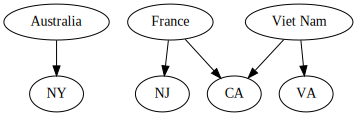

In [34]:
#q13
overlap = {}
countries = ['Australia', 'France', 'Viet Nam']
for country_name in countries:
#     print(country_name)
    merged_country_summed = pd.merge(df, ips, how='left', left_on='ip',right_on='ip_address')
    country_df = merged_country_summed.loc[merged_country_summed['country']==country_name]


    overlap[country_name] = set()

    for valid_file in country_df['new_file']:
        if valid_file in filing_dict:
#             print(filing_dict[valid_file].state())
            state = filing_dict[valid_file].state()
            if state !=None:
                overlap[country_name].add(filing_dict[valid_file].state())
overlap

# draw Digraph
d= graphviz.Digraph()
for country, states in overlap.items():
    for state in states:
        d.edge(country,state)
d


In [30]:
merged_country_summed

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser,summed,new_file,ip_address,count,country
0,104.197.32.ihd,2017-01-01,00:00:00,0.0,1111711,0001193125-12-324016,-index.htm,200.0,7627.0,1.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0000902664-13-001995/-ind...,1111711/0001193125-12-324016/-index.htm,104.197.32.ihd,2627,United States of America
1,208.77.214.jeh,2017-01-01,00:00:00,0.0,789019,0001193125-06-031505,.txt,200.0,46327.0,0.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0000902664-13-003374/-ind...,789019/0001193125-06-031505/.txt,208.77.214.jeh,3806,United States of America
2,54.197.228.dbe,2017-01-01,00:00:00,0.0,800166,0001279569-16-003038,-index.htm,200.0,16414.0,1.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0000902664-14-002822/-ind...,800166/0001279569-16-003038/-index.htm,54.197.228.dbe,273,United States of America
3,108.39.205.jga,2017-01-01,00:00:01,0.0,354950,0000950123-09-011236,-index.htm,200.0,8718.0,1.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0001140361-13-005688/-ind...,354950/0000950123-09-011236/-index.htm,108.39.205.jga,2325,United States of America
4,52.45.218.ihf,2017-01-01,00:00:01,0.0,1313918,0001209191-06-031555,.txt,200.0,8911.0,0.0,0.0,0.0,10.0,0.0,NaN,-9223372036854775808/0001464631-12-000001/-ind...,1313918/0001209191-06-031555/.txt,52.45.218.ihf,5562,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174851,218.50.187.afh,2017-01-01,23:59:56,0.0,1295803,0001181431-07-073286,.txt,200.0,29312.0,0.0,0.0,0.0,10.0,0.0,NaN,<NA>,1295803/0001181431-07-073286/.txt,218.50.187.afh,2958,Korea (Republic of)
174852,204.212.175.bch,2017-01-01,23:59:57,0.0,89439,0001140361-14-029415,.txt,200.0,2165.0,0.0,0.0,0.0,10.0,0.0,NaN,<NA>,89439/0001140361-14-029415/.txt,204.212.175.bch,4708,United States of America
174853,157.55.39.jad,2017-01-01,23:59:58,0.0,1253986,0001104659-12-032900,a12-8801_1ex31d2.htm,301.0,630.0,0.0,0.0,0.0,10.0,0.0,NaN,<NA>,1253986/0001104659-12-032900/a12-8801_1ex31d2.htm,157.55.39.jad,938,United States of America
174854,94.156.218.jad,2017-01-01,23:59:58,0.0,1591913,0001615774-16-009113,-index.htm,200.0,7037.0,1.0,0.0,0.0,10.0,0.0,NaN,<NA>,1591913/0001615774-16-009113/-index.htm,94.156.218.jad,1460,Bulgaria


In [25]:
pd.DataFrame(df['ip'])

,ip
0,104.197.32.ihd
1,208.77.214.jeh
2,54.197.228.dbe
3,108.39.205.jga
4,52.45.218.ihf
...,...
174851,218.50.187.afh
174852,204.212.175.bch
174853,157.55.39.jad
174854,94.156.218.jad


In [26]:
#q13
overlap = {}
for i, row in df.iterrows():
    region = edgar_utils.lookup_region(row['ip'])
    if region =="Australia" or region =="France" or region =="Viet Nam":
        filename = str(int(row["cik"]))+"/"+row["accession"]+"/"+row["extention"]
        if region not in overlap:
            overlap[region] = [filename]
        else:
            overlap[region].append(filename)
            
# draw Digraph
d= graphviz.Digraph()
for country, states in overlap.items():
    for state in states:
        d.edge(country,state)
d

KeyboardInterrupt: 

여기까지

In [ ]:
#q14
address_counter = {}

for file in filing_dict:
    addresses = filing_dict[file].addresses
    if addresses !=None:
        counter_df = temp_df.loc[temp_df['summed'] ==file]
        
#         print(counter_df[0])
        for address in addresses:
#             print(address)
            if not address in address_counter:
                address_counter[address] = 0
            address_counter[address] += int(counter_df[0])

#             print(counter_df)
filtered_address_counter={}

for new_key, new_value in address_counter.items():
   
   if new_value >=225:
        filtered_address_counter[new_key]=new_value
filtered_address_counter

In [ ]:
#q15
import geopandas as gpd
import matplotlib as plt
from shapely.geometry import Polygon, box, Point

locations = gpd.read_file("locations.geojson")

addr_count = pd.DataFrame(address_counter.items())
addr_count =addr_count.rename(columns={0: "address", 1:"count"})

merged_locations = locations.merge(addr_count, on='address',how='left' )



us_map = gpd.read_file("shapes/cb_2018_us_state_20m.shp")
us_window = box(-130,20,-55,50)
new_us = us_map[us_map.intersects(us_window)].to_crs("EPSG: 3395")
new_df = merged_locations[merged_locations.intersects(us_window)].to_crs("EPSG:3395").sort_values(by="count")

ax=new_us.plot(color = "lightgray", figsize=(10,7))
ax=new_df.plot(ax=ax, column="count",legend =True, cmap="plasma")
ax.set_title("Frequency of Request Visited by Address in the U.S.")